In [41]:
# Defines
#=================================================#
IS_TRAIN_NOT_TEST = True

ENV_LOCAL_MACHINE   = 1
ENV_GOOGLE_COLLABS  = 2
ENV_KAGGLE          = 3
ENVIRONMENT = ENV_LOCAL_MACHINE

#=================================================#
RANDOM_SEED = 214
OVERSAMPLING_RATIO = 0.3
UNDERSAMPLING_RATIO = 0.8
N_JOBS = -1

#=================================================#
PATH_INPUT              = "dataset/creditcard/"
PATH_OUTPUT             = "outputs/creditcard/"

CSV_DATASET_RAW                     = "creditcard.csv"
CSV_DATASET_TRAIN                   = "dataset_train.csv"
CSV_DATASET_TEST                    = "dataset_test.csv"
CSV_DATASET_TRAIN_TRANSFORMED       = "dataset_train_t.csv"
CSV_DATASET_TEST_TRANSFORMED        = "dataset_test_t.csv"


if ENVIRONMENT == ENV_LOCAL_MACHINE:
    PATH_DATASET_BASE  = "../"
if ENVIRONMENT == ENV_GOOGLE_COLLABS:
    PATH_DATASET_BASE  = "drive/MyDrive/UTN_Finales/[F] Aprendizaje Automatico/Repositorio/"

FEATURE_TARGET = "Class"

In [42]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [43]:
# Import dataset train
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN)
print("Dataset Size:", dataset.shape[0])
X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]

dataset.sample(3)

Dataset Size: 199364


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
80263,128898.0,2.127336,-1.741446,-0.826519,-1.775699,-1.171868,0.231607,-1.366614,0.046064,-1.209371,...,-0.364379,-0.766387,0.249511,-1.215913,-0.530595,-0.440404,0.022316,-0.041326,97.33,0
12702,67604.0,-0.492977,0.755356,1.114600,-0.799319,0.250940,0.144195,0.341858,-0.110338,0.191373,...,-0.089349,-0.168607,-0.165092,-0.811712,-0.740705,0.906520,-0.246792,-0.037422,2.92,0
173864,37588.0,1.162218,0.356941,0.353825,2.425988,-0.106533,-0.299243,0.072423,-0.023685,-0.465563,...,0.022471,-0.100918,-0.142786,-0.159030,0.561005,0.100918,-0.028702,0.018344,37.88,0


In [44]:
# Import dataset test
dataset_test= pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST)
print("Dataset Size:", dataset_test.shape[0])
X_test = dataset_test.drop(FEATURE_TARGET, axis=1)
y_test = dataset_test[FEATURE_TARGET]

dataset_test.sample(3)

Dataset Size: 85443


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
44138,69266.0,-0.390746,0.989555,0.510056,0.785159,-0.014781,0.167568,0.237388,0.592910,-0.854763,...,0.242971,0.532798,0.003405,-0.319173,-0.201631,-0.294195,-0.046784,-0.034173,41.30,0
8695,159069.0,1.242249,-1.053644,-1.463298,2.072823,-0.290539,-0.144140,0.290392,-0.142982,1.011464,...,0.427021,0.908930,-0.361675,1.072993,0.320105,-0.338581,-0.003711,0.050103,360.89,0
76015,83099.0,-0.706925,-0.227413,0.810964,-1.908891,2.102545,3.499152,-0.857305,1.094489,0.842533,...,0.031000,0.048587,-0.280059,1.027330,0.464595,-0.490993,0.149410,0.094876,1.00,0


In [45]:
# Transform
columns_to_exp    = ['V8', 'V11', 'V19', 'V21', 'V22']
columns_to_cbrt   = ['Time', 'V24', 'V28', 'V20', 'V25', 'V27']

dataset[columns_to_exp]   = np.exp(dataset[columns_to_exp])
dataset[columns_to_cbrt]  = np.cbrt(dataset[columns_to_cbrt])

dataset_test[columns_to_exp]   = np.exp(dataset_test[columns_to_exp])
dataset_test[columns_to_cbrt]  = np.cbrt(dataset_test[columns_to_cbrt])

In [46]:
# Specify columns for standardization and normalization
columns_to_standardize = ['Time', 'V1', 'V5', 'V11', 'V19', 'V21', 'V22', 'V23', 'V24', 'V28']
columns_to_normalize = ['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V25', 'V26', 'V27', 'Amount']

# Create instances of scalers
scaler_standard = StandardScaler()
scaler_minmax   = MinMaxScaler()

# Apply transformations to specified columns
dataset[columns_to_standardize] = scaler_standard.fit_transform(dataset[columns_to_standardize])
dataset[columns_to_normalize]   = scaler_minmax.fit_transform(dataset[columns_to_normalize])

dataset_test[columns_to_standardize] = scaler_standard.fit_transform(dataset_test[columns_to_standardize])
dataset_test[columns_to_normalize]   = scaler_minmax.fit_transform(dataset_test[columns_to_normalize])

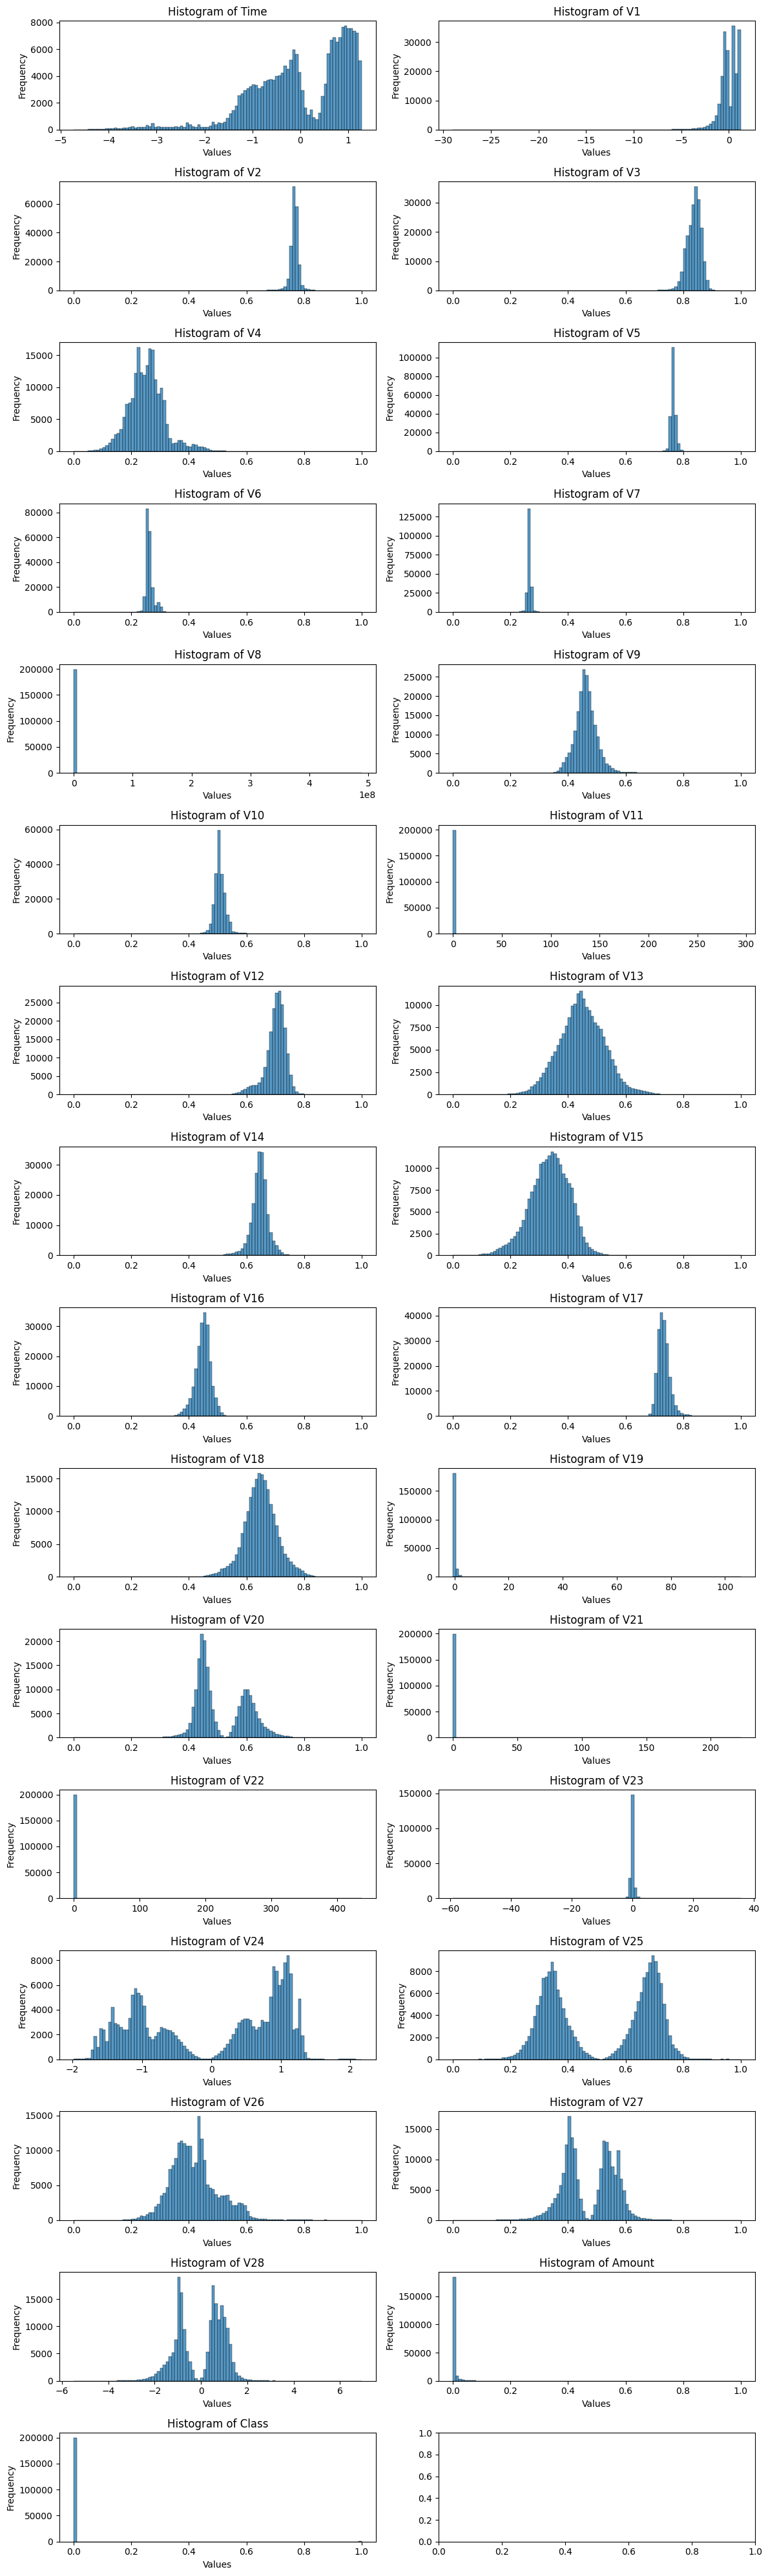

In [47]:
# Determine the number of rows and columns for subplots
num_cols = len(dataset.columns)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i, param in enumerate(dataset.columns):
    sns.histplot(dataset[param], bins=100, ax=axs[i])
    axs[i].set_title(f'Histogram of {param}')
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

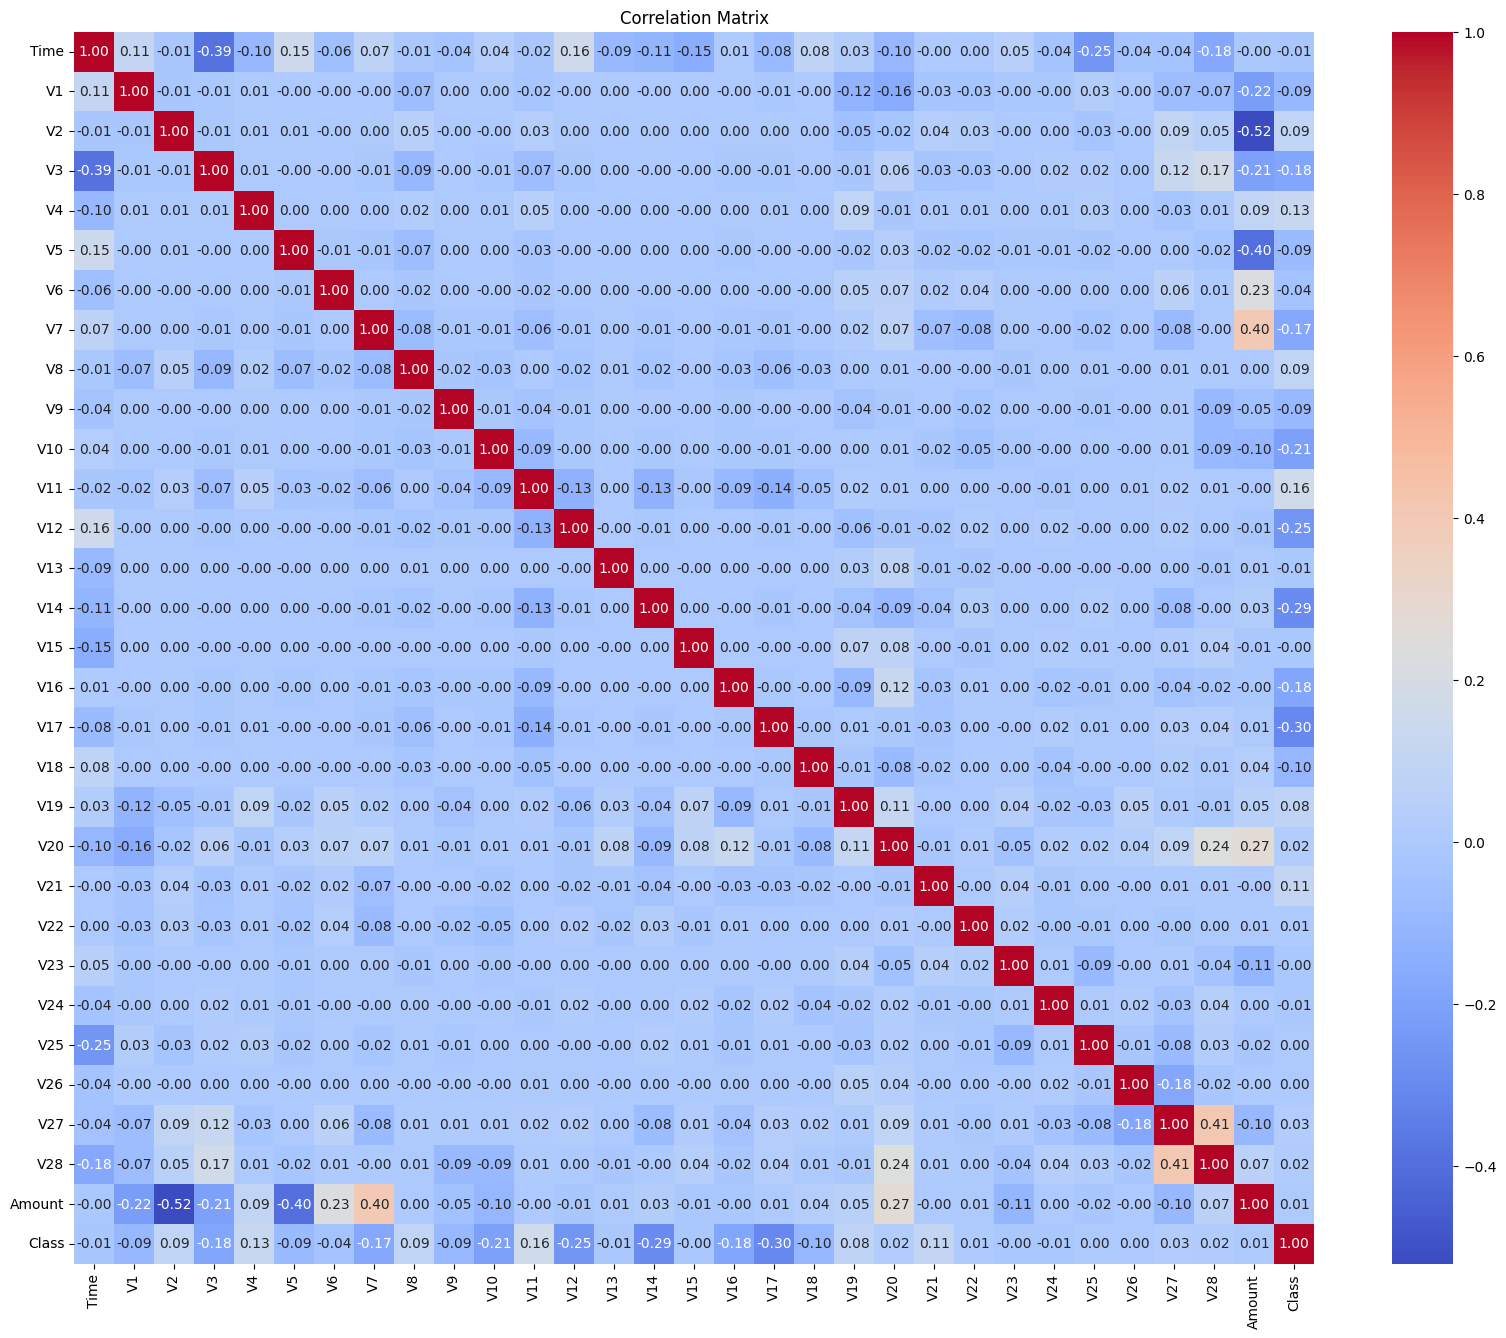

In [48]:
# Plot the correlation matrix
corr_matrix = dataset.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [49]:
high_corr_features = corr_matrix[abs(corr_matrix[FEATURE_TARGET]) >= 0.01].index
high_corr_features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
       'V27', 'V28', 'Class'],
      dtype='object')

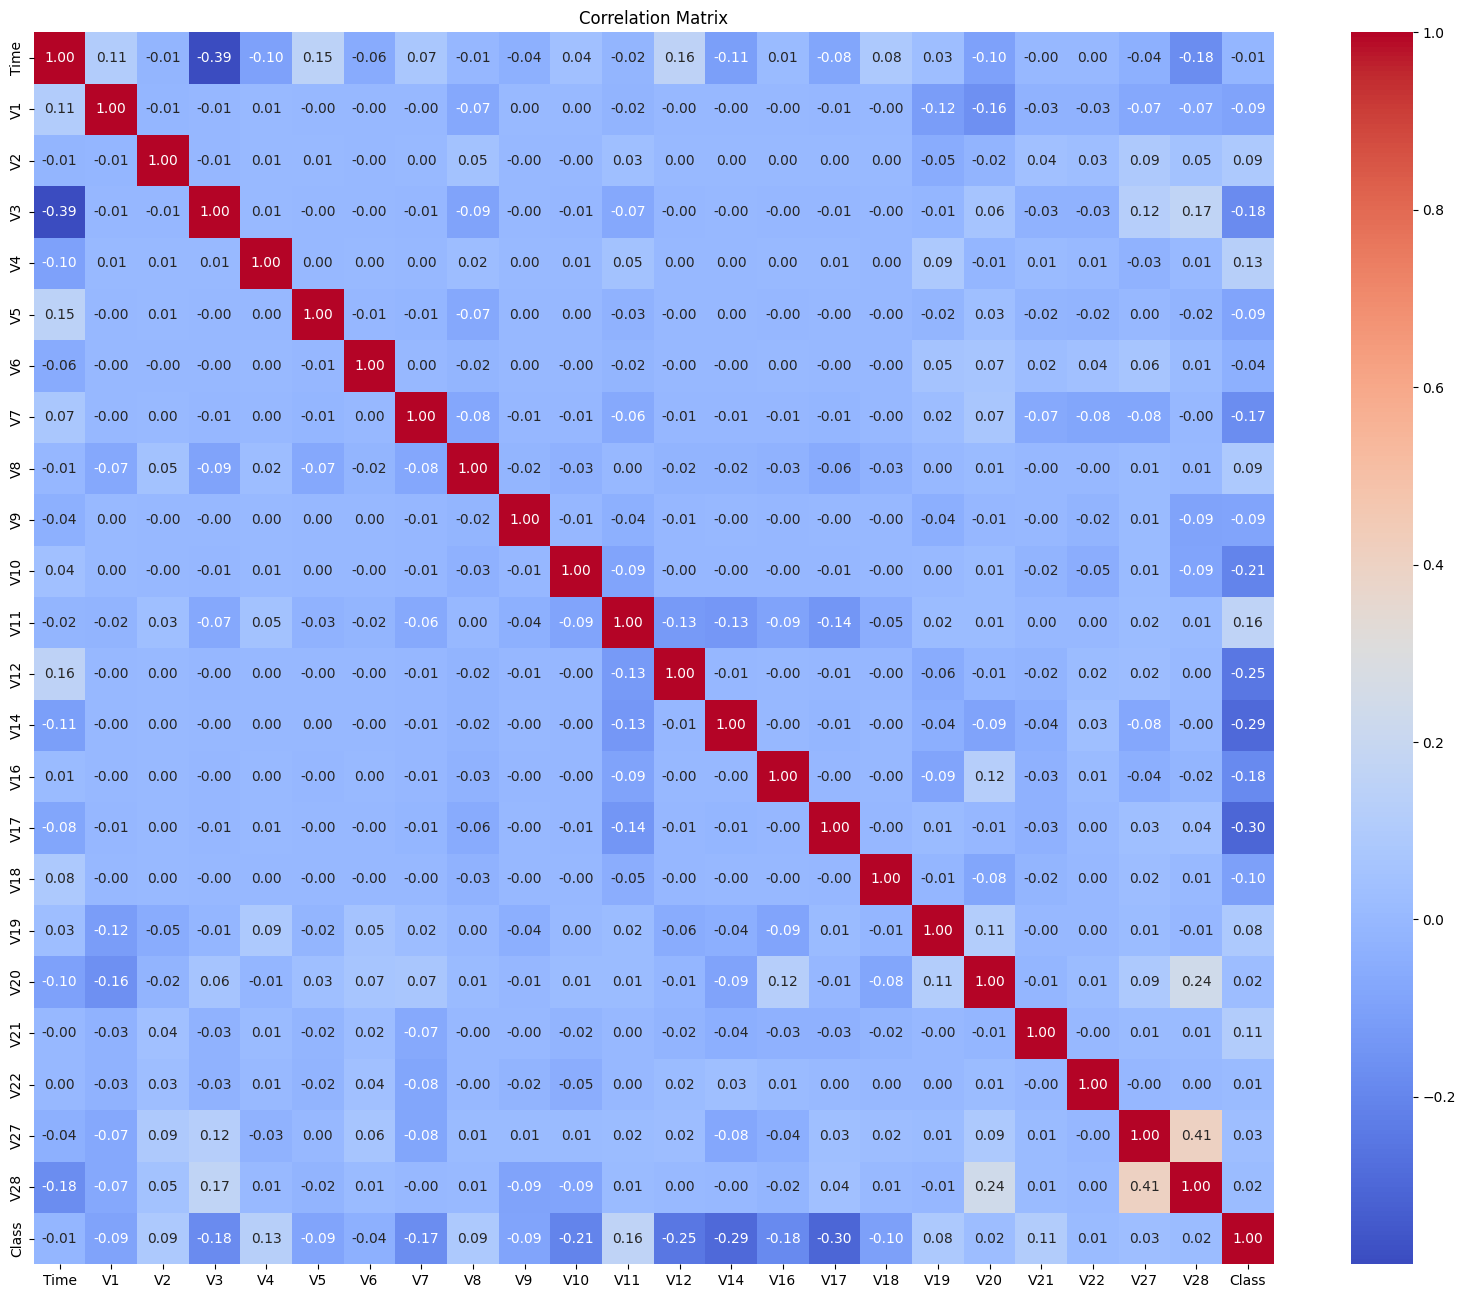

In [50]:
dataset_filtered = dataset[high_corr_features]
# Plot the correlation matrix
corr_matrix_filtered = dataset_filtered.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [51]:
dataset_test_filtered = dataset_test[high_corr_features]

In [52]:
# Save test dataset apart to another file
dataset_filtered.to_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED, index=False)

# Save train dataset apart to another file
dataset_test_filtered.to_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN_TRANSFORMED, index=False)